In [30]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
tf.__version__

'2.3.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Change current working directory to project folder (2 marks)


In [37]:
path='/content/PINS'

### Extract the zip file (3 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [ ]:
# importing required modules 
from zipfile import ZipFile

path_zip='/content/drive/My Drive/'

# specifying the zip file name 
file_name = "Aligned Face Dataset from Pinterest.zip"

# opening the zip file in READ mode 
with ZipFile(path_zip+file_name, 'r') as zip: 
	# printing all the contents of the zip file 
	zip.printdir() 

	# extracting all the files 
	print('Extracting all the files now...') 
	zip.extractall() 
	print('Done!') 


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 

In [38]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata(path)
metadata

array([/content/PINS/pins_Mark Ruffalo/Mark Ruffalo53.jpg,
       /content/PINS/pins_Mark Ruffalo/Mark Ruffalo24.jpg,
       /content/PINS/pins_Mark Ruffalo/Mark Ruffalo32.jpg, ...,
       /content/PINS/pins_Neil Patrick Harris/Neil Patrick Harris67.jpg,
       /content/PINS/pins_Neil Patrick Harris/Neil Patrick Harris19.jpg,
       /content/PINS/pins_Neil Patrick Harris/Neil Patrick Harris15.jpg],
      dtype=object)

### Define function to load image

In [6]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (3 marks)
- Load one image using the function "load_image"

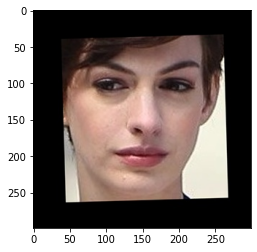

In [31]:
images=[]
for i in range(0,len(metadata)-10769):
  images.append(load_image(metadata[i].base+'/'+metadata[i].name+'/'+metadata[i].file))
plt.imshow(images[0])

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (3 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [8]:
from keras.models import load_model
model=vgg_face()
path_weights='/content/drive/My Drive/'
model.load_weights(path_weights+'face_recognition_weights.h5')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

### Get vgg_face_descriptor

In [10]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model.

In [11]:
def load_embeddings(metadata, i):
  img_path = metadata[i].image_path()
  img = load_image(img_path)
  
  # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  
  img = (img / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224,224))
  
  # Obtain embedding vector for an image
  # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
  
  embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  
  # print(embedding_vector.shape)
  
  return embedding_vector

### Generate embeddings for all images (8 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [13]:
embeddings = []
for i in range (0,len(metadata)):
  # print(i)
  temp=np.zeros((metadata.shape[0], 2622))
  temp=load_embeddings(metadata,i)
  embeddings.append(temp)

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [14]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

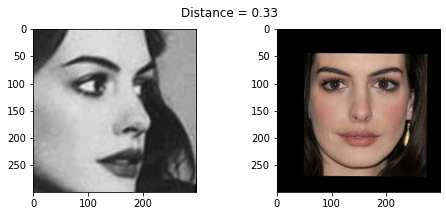

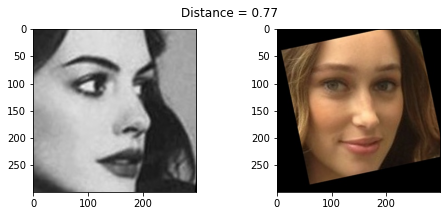

In [15]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

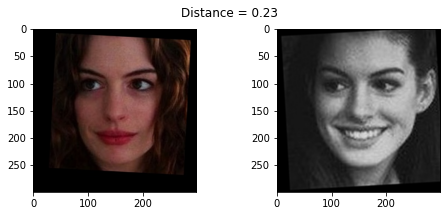

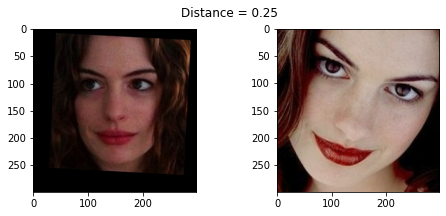

In [32]:
show_pair(30, 31)
show_pair(30, 100)

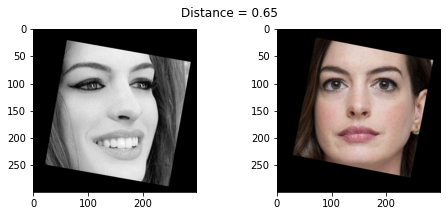

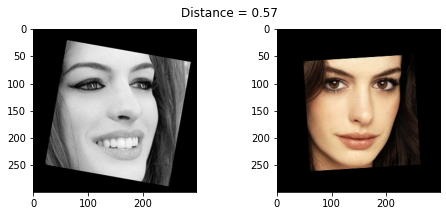

In [34]:
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (8 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [16]:
import random 
import math
random.seed(0)

# shuffled_indices=np.arange(0,metadata.shape[0])
shuffled_indices=np.arange(0,len(embeddings))
random.shuffle(shuffled_indices)
SPLIT_PERCENTAGE=0.7
x_train,x_test=[],[]
y_train,y_test=[],[]
for i in range(0,(math.ceil(len(shuffled_indices)*SPLIT_PERCENTAGE))):
  x_train.append(embeddings[shuffled_indices[i]])
  y_train.append(metadata[shuffled_indices[i]].name.split('_')[1])
for i in range((math.ceil(len(shuffled_indices)*SPLIT_PERCENTAGE)),len(embeddings)):
  x_test.append(embeddings[shuffled_indices[i]])
  y_test.append(metadata[shuffled_indices[i]].name.split('_')[1])
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7539, 2622), (3231, 2622), (7539,), (3231,))

### Encode the Labels (4 marks)
- Encode the targets
- Use LabelEncoder

In [17]:
from sklearn.preprocessing import LabelEncoder

#### Add your code here ####
le= LabelEncoder()
le.fit(y_train)
Y_train= le.transform(y_train)
Y_test= le.transform(y_test)
Y_train.shape,Y_test.shape

((7539,), (3231,))

In [18]:
# from sklearn.preprocessing import OneHotEncoder

# enc = OneHotEncoder(handle_unknown='ignore')
# enc.fit(le.transform(y_train).reshape(-1,1))
# Y_train = enc.transform(le.transform(y_train).reshape(-1,1))
# Y_test = enc.transform(le.transform(y_test).reshape(-1,1))
# Y_train.shape,Y_test.shape

### Standardize the feature values (4 marks)
- Scale the features using StandardScaler

In [19]:
# Standarize features
from sklearn.preprocessing import StandardScaler

#### Add your code here ####
sc=StandardScaler()
sc.fit(x_train)
X_train=sc.transform(x_train)
X_test=sc.transform(x_test)

### Reduce dimensions using PCA (4 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [20]:
from sklearn.decomposition import PCA
#### Add your code here ####
pca=PCA()
pca.fit(X_train)
k = 0
total = 0
while total <.99:
    total = total + pca.explained_variance_ratio_[k]   
    k = k + 1
k

883

In [21]:
pc = PCA(n_components=128)
transformed_data_train = pc.fit_transform(X_train)
transformed_data_test = pc.transform(X_test) 

In [22]:
Y_train.shape,transformed_data_train.shape

((7539,), (7539, 128))

### Build a Classifier (4 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [23]:
from sklearn.svm import SVC

#### Add your code here ####

svm=SVC()
svm.fit(transformed_data_train,Y_train)
svm.score(transformed_data_test,Y_test)

0.9600742804085423

In [26]:
from sklearn.model_selection import GridSearchCV
clf=SVC()
clf.fit(transformed_data_train,Y_train)
grid = {'C' : [1e2, 1e3, 5e3, 1e4, 5e4, 1e5],
       'gamma' : [1e-3, 5e-4, 1e-4, 5e-3]}
abc = GridSearchCV(clf, grid)
abc.fit(transformed_data_train,Y_train)
abc.best_estimator_

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
abc.best_estimator_.score(transformed_data_test,Y_test)

0.9613122872175797

### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

Text(0.5, 350, 'Predicted Identity:grant gustin face')

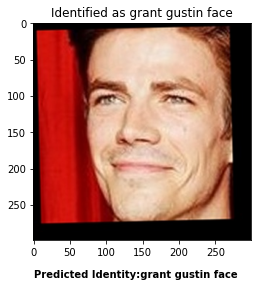

In [27]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_prediction = abc.best_estimator_.predict([transformed_data_test[example_idx]])
example_identity = le.inverse_transform([Y_test[example_idx]])[0]

plt.imshow(load_image(metadata[shuffled_indices[(math.ceil(len(shuffled_indices)*SPLIT_PERCENTAGE))+example_idx]].image_path()))
sample_printing_text='Predicted Identity:'+le.inverse_transform(example_prediction)[0]
plt.title(f'Identified as {example_identity}');
plt.text(s=sample_printing_text,y=350,x=0.5,fontweight='semibold',horizontalalignment='left')
# print(sample_printing_text)
